<a href="https://colab.research.google.com/github/min02yam/wether/blob/main/%EC%98%88%EB%B3%B4_2012_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

예보데이터(2012~2016) <br>


# 0.라이브러리 및 데이터 로드

In [ ]:
install.packages("DataExplorer")
library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




In [ ]:
install.packages("imputeTS")
library(imputeTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘xts’, ‘TTR’, ‘markdown’, ‘RCurl’, ‘png’, ‘jpeg’, ‘quadprog’, ‘quantmod’, ‘gridtext’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘ggtext’, ‘stinepack’, ‘forecast’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
suppressPackageStartupMessages({
  require(tidyverse)
  require(magrittr)
  require(data.table)
})

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
system("gdown --id 1EkwbK7uSNOCuo5H3frhxsg2ZuAlTu7C0")  #2012
system("gdown --id 1L2NIn_hFZww3uGpysoWapSxF_-CIiBbF")  #2013
system("gdown --id 1pZ__BBjPH8PygXqU8DAInDHoWPH3SM1J")  #2014
system("gdown --id 1Yy7Zv5_cARL0f4qJFN3R2bxOQOQjfif8")  #2015
system("gdown --id 1exNYMxNSx6kPyEbEk2rKkaRVNSjGnO4Y")  #2016

In [ ]:
f2012 =  fread("f2012.csv")
f2013 =  fread("f2013.csv")
f2014 =  fread("f2014.csv")
f2015 =  fread("f2015.csv")
f2016 =  fread("f2016.csv")

# 1.테이블 최종 병합

In [ ]:
예보 = bind_rows(f2012, f2013, f2014, f2015, f2016)

In [ ]:
예보 %>%  summary # 확인

      date            f평균3시간기온    f평균강수형태      f평균습도     
 Min.   :2012-01-01   Min.   :-16.420   Min.   :0.0000   Min.   : 10.00  
 1st Qu.:2013-03-30   1st Qu.:  3.333   1st Qu.:0.0000   1st Qu.: 65.69  
 Median :2014-06-27   Median : 12.700   Median :0.0000   Median : 77.00  
 Mean   :2014-06-30   Mean   : 11.648   Mean   :0.1245   Mean   : 74.49  
 3rd Qu.:2015-10-04   3rd Qu.: 20.000   3rd Qu.:0.0000   3rd Qu.: 85.00  
 Max.   :2016-12-31   Max.   : 30.800   Max.   :3.0000   Max.   :100.00  
                                        NA's   :10       NA's   :384     
 f평균하늘상태       area          
 Min.   :1.000   Length:29061      
 1st Qu.:2.000   Class :character  
 Median :3.000   Mode  :character  
 Mean   :2.574                     
 3rd Qu.:3.000                     
 Max.   :4.000                     
 NA's   :2971                      

# 3.결측치 대체
- 그룹별(area)로 칼만 알고리즘 적용 

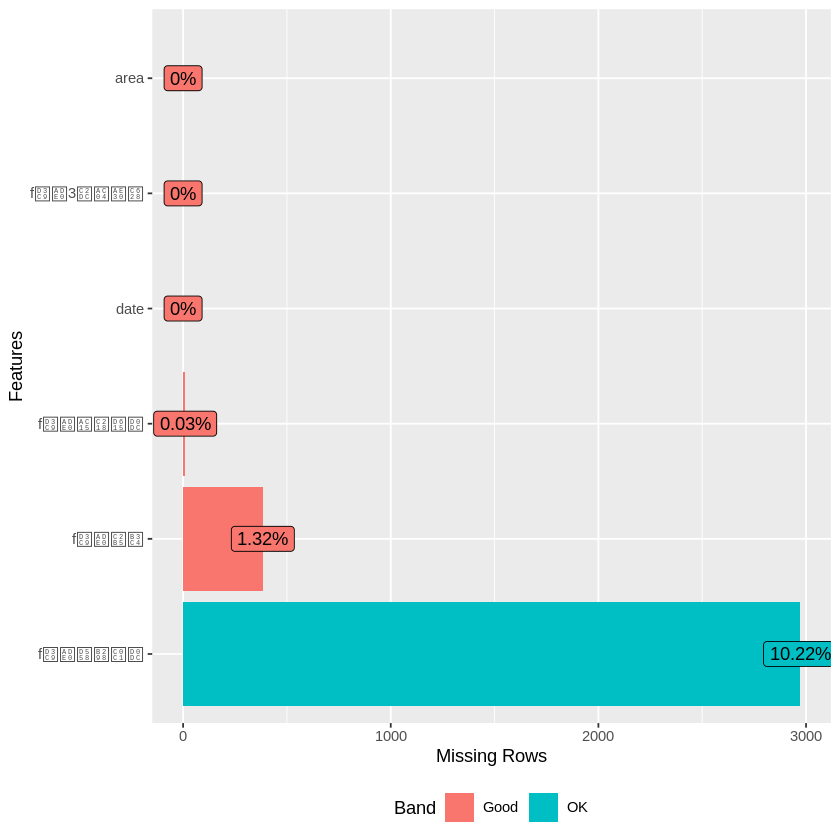

In [ ]:
plot_missing(예보)

In [ ]:
# 지역별로 칼만 필터 알고리즘 적용해서 리스트로 반환
예보 %>% group_split(area)  %>%
  lapply(function(x){na_kalman(x, model = "StructTS", smooth = TRUE)}) ->imp_list
#data.table로 변경
rbindlist(imp_list) -> imp_dt

In [ ]:
# 확인
imp_dt %>% is.na() %>% sum 

[1] 0

# 4.저장

In [ ]:
write.csv(imp_dt, "예보_최종.csv", row.names=FALSE)